# Kaggle Bag of Popcorn challenge
>In this tutorial competition, we dig a little "deeper" into sentiment analysis. Google's Word2Vec is a deep-learning inspired method that focuses on the meaning of words. Word2Vec attempts to understand meaning and semantic relationships among words. It works in a way that is similar to deep approaches, such as recurrent neural nets or deep neural nets, but is computationally more efficient. This tutorial focuses on Word2Vec for sentiment analysis.
>
>Sentiment analysis is a challenging subject in machine learning. People express their emotions in language that is often obscured by sarcasm, ambiguity, and plays on words, all of which could be very misleading for both humans and computers. There's another Kaggle competition for movie review sentiment analysis. In this tutorial we explore how Word2Vec can be applied to a similar problem.
>
>Deep learning has been in the news a lot over the past few years, even making it to the front page of the New York Times. These machine learning techniques, inspired by the architecture of the human brain and made possible by recent advances in computing power, have been making waves via breakthrough results in image recognition, speech processing, and natural language tasks. Recently, deep learning approaches won several Kaggle competitions, including a drug discovery task, and cat and dog image recognition.
>
>__Tutorial Overview__
>
>This tutorial will help you get started with Word2Vec for natural language processing. It has two goals: 
>
>Basic Natural Language Processing: Part 1 of this tutorial is intended for beginners and covers basic natural language processing techniques, which are needed for later parts of the tutorial.
>
>Deep Learning for Text Understanding: In Parts 2 and 3, we delve into how to train a model using Word2Vec and how to use the resulting word vectors for sentiment analysis.
>
>Since deep learning is a rapidly evolving field, large amounts of the work has not yet been published, or exists only as academic papers. Part 3 of the tutorial is more exploratory than prescriptive -- we experiment with several ways of using Word2Vec rather than giving you a recipe for using the output.
>
>To achieve these goals, we rely on an IMDB sentiment analysis data set, which has 100,000 multi-paragraph movie reviews, both positive and negative. 

In this notebook, I'll first explore the Frequency-based methods such as BOW and TFIDF.  In other notebooks, I'll delve into Word2Vec and deep learning approaches

## 1. Load the Data

In [2]:
# Load the data
import pandas as pd

data = pd.read_csv('labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
data.shape

(25000, 3)

In [3]:
data.head(10)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
5,"""8196_8""",1,"""I dont know why people think this is such a b..."
6,"""7166_2""",0,"""This movie could have been very good, but com..."
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm..."
8,"""319_1""",0,"""A friend of mine bought this film for £1, and..."
9,"""8713_10""",1,"""<br /><br />This movie is full of references...."


In [4]:
data['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

## 2. Text Preprocessing

In [5]:
from bs4 import BeautifulSoup
import nltk
import re
import numpy as np

wpt = nltk.WordPunctTokenizer()

# convert from list to set b/c in Python searching a set is much faster than searching a list
# Not shown here, but the difference in speed for this data set is nearly 4-fold, i.e., 
# searching the list takes abou 4x longer than searching a set. 
stop_words = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    # strip html tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # lower case, remove special characters, and strip leading and trailing whitespaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text, re.I|re.A)
    text = text.lower()
    text = text.strip()
    
    # tokenize
    tokens = wpt.tokenize(text)
    
    # filter out stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join text back
    text = ' '.join(filtered_tokens)
    return text

clean_corpus = np.vectorize(clean_text)

In [6]:
# use vectorization to clean the text and append to dataframe
data['clean_review'] = clean_corpus(data['review'])

data.head(10)

,id,sentiment,review,clean_review
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",stuff going moment mj started listening music ...
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",classic war worlds timothy hines entertaining ...
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",film starts manager nicholas bell giving welco...
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",must assumed praised film greatest filmed oper...
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",superbly trashy wondrously unpretentious explo...
5,"""8196_8""",1,"""I dont know why people think this is such a b...",dont know people think bad movie got pretty go...
6,"""7166_2""",0,"""This movie could have been very good, but com...",movie could good comes way short cheesy specia...
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm...",watched video friend house glad waste money bu...
8,"""319_1""",0,"""A friend of mine bought this film for £1, and...",friend mine bought film even grossly overprice...
9,"""8713_10""",1,"""<br /><br />This movie is full of references....",movie full references like mad max ii wild one...


## 3. Split the data

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data['clean_review'], data['sentiment'], test_size=0.4, random_state=0)

In [8]:
print(X_train.shape, y_train.shape)

(15000,) (15000,)


In [9]:
print(X_test.shape, y_test.shape)

(10000,) (10000,)


## 4. Analyze Using Frequency-Based Approaches

Traditional approaches that use some variation of frequency of word appearance in the text. These include
    1. Bag of Words
    2. TFIDF

These are typically faster and easier to implement than the more advanced Word2Vec approaches.  Will start with these approaches to see how they perform and then move on to more complex methods

### 4.1 Bag of Words (BOW)

This method simply counts the number of times a word appears in a document.  I'll be implementing BOW using scikit learn's `CountVectorizer`

#### 4.1.1 Train the model

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Only use the top 10,000 words
cv = CountVectorizer(max_features=10000)
train_data_features = cv.fit_transform(X_train)
print(train_data_features.shape)

(15000, 10000)


In [11]:
vocab = cv.get_feature_names()
print(vocab[:100])

['aag', 'aaron', 'abandon', 'abandoned', 'abbot', 'abbott', 'abc', 'abducted', 'abe', 'abhay', 'abigail', 'abilities', 'ability', 'able', 'aboard', 'abominable', 'abomination', 'abortion', 'abound', 'abraham', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absorbed', 'absorbing', 'abstract', 'absurd', 'absurdity', 'abu', 'abundance', 'abuse', 'abused', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accident', 'accidental', 'accidentally', 'acclaim', 'acclaimed', 'accompanied', 'accompanying', 'accomplish', 'accomplished', 'accomplishment', 'according', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accused', 'ace', 'achieve', 'achieved', 'achievement', 'achievements', 'achieves', 'achieving', 'achilles', 'acid', 'acknowledge', 'acknowledged', 'acquire', 'acquired', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'active', 'ac

#### 4.1.2 Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(train_data_features, y_train)

#### 4.1.3 Evaluate model

In [13]:
# Predict on train set
y_train_pred = forest.predict(train_data_features)

# BOW on test data set
test_data_features = cv.transform(X_test)

# Predict sentiments on test set using the trained forest classifer
y_test_pred = forest.predict(test_data_features)

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, ax, vmax=None,
                          normed=True, title='Confusion matrix'):
    cm = confusion_matrix(y_true, y_pred)
    if normed:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, vmax=vmax, annot=True, square=True, ax=ax, 
                cmap='Blues', cbar=False, linecolor='k',
               linewidths=1)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('True labels', fontsize=12)
    ax.set_xlabel('Predicted labels', y=1.10, fontsize=12)

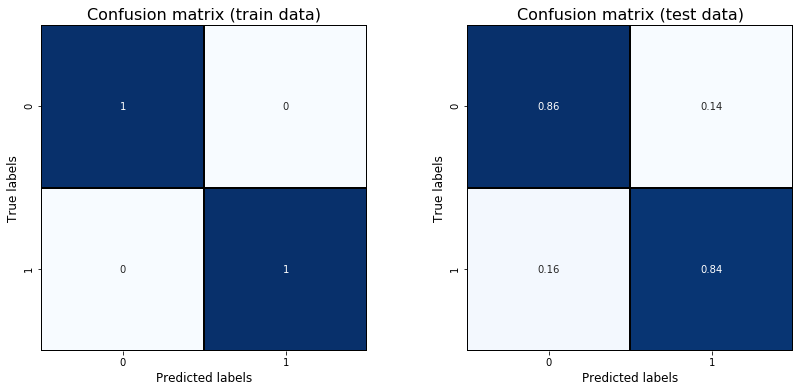

In [52]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
plot_confusion_matrix(y_train, y_train_pred, ax=axis1, 
                      title='Confusion matrix (train data)')
plot_confusion_matrix(y_test, y_test_pred, ax=axis2, 
                      title='Confusion matrix (test data)')


In [53]:
from sklearn.metrics import classification_report
print('Classification report on Test set: \n', classification_report(y_test, y_test_pred))

Classification report on Test set: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      5055
           1       0.85      0.84      0.85      4945

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



The simple BOW performs surprisingly well on this data with an accuracy of 85% and an F1 score of 85%. 

Remember:  While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.

### 4.2 Bag of N-Grams Model

Just like BOW, but instead of only using one word, it uses a collection of word tokens.  For example, a bi-gram indicates n-grams of order 2 (two words), tri-gram indicats n-grams of order 3 (three words), etc. 

##### 4.2.1 Train the Model

In [54]:
# Using bigrams and trigrams by setting the range from 2 to 3. 
bv = CountVectorizer(ngram_range=(2, 3))
train_data_features = bv.fit_transform(X_train)
print(train_data_features.shape)

(15000, 2847781)


In [55]:
vocab = bv.get_feature_names()
print(vocab[:100])

['10 10', '10 battle', '10 battle scenes', '10 cunningham', '10 cunningham use', '10 ending', '10 ending stinks', '10 entertaining', '10 entertaining way', '10 movie', '10 movie enjoyable', '10 ratings', '10 ratings compare', '10 recommend', '10 recommend lovely', '10 times', '10 times many', '16 pigalle', '16 pigalle richard', '17 montmartre', '17 montmartre bruno', '18 porte', '18 porte de', '1958 oliver', '1958 oliver 1968', '1968 fagin', '1968 fagin handle', '1980 animation', '1980 animation quite', '2004 walkleys', '2004 walkleys investigate', '2006 fact', '2006 fact think', '20th century', '20th century end', '22 minute', '22 minute episode', '28 2005', '35 minutes', '35 minutes viewing', '3d games', '3d games 10', '3d introduced', '3d introduced feature', '40 years', '40 years solved', '400 coups', '400 coups much', '60 skirt', '60 skirt girl', '90 many', '90 many dialogue', 'aa level', 'aa level moves', 'aa yet', 'aa yet well', 'aaa level', 'aaa level one', 'aaa parvarish', 'aa

#### 4.2.2 Random Forest Classifier

In [56]:
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(train_data_features, y_train)

#### 4.2.3 Evaluate the Model

In [57]:
# Predict on train set
y_train_pred = forest.predict(train_data_features)

# BOW on test data set
test_data_features = bv.transform(X_test)

# Predict sentiments on test set using the trained forest classifer
y_test_pred = forest.predict(test_data_features)

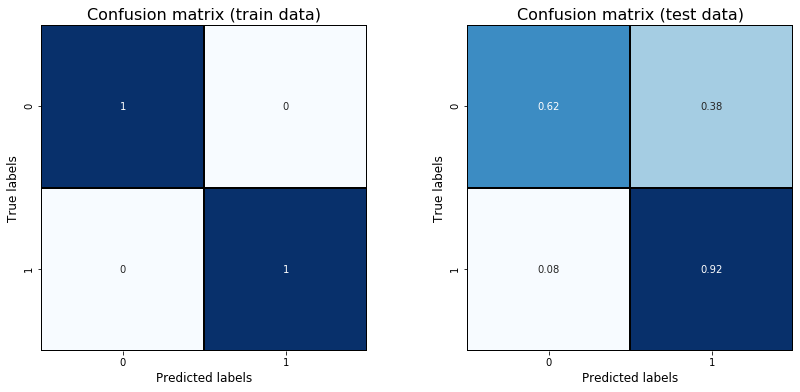

In [58]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
plot_confusion_matrix(y_train, y_train_pred, ax=axis1,
                      title='Confusion matrix (train data)')
plot_confusion_matrix(y_test, y_test_pred, ax=axis2,
                      title='Confusion matrix (test data)')

In [59]:
from sklearn.metrics import classification_report
print('Classification report on Test set: \n', classification_report(y_test, y_test_pred))

Classification report on Test set: 
               precision    recall  f1-score   support

           0       0.89      0.62      0.73      5055
           1       0.70      0.92      0.80      4945

    accuracy                           0.77     10000
   macro avg       0.80      0.77      0.77     10000
weighted avg       0.80      0.77      0.76     10000



The n-gram BOW model with bigrams and trigrams does not perform nearly as well as the simpler unigram BOW model.  It especially struggles with accuractely classifying negative sentiment text with a false negative rate of 0.38. Accuracy is only 77% compared to 85% with the unigram BOW model and the F1 score is only 80% compared to 85%.  Clearly, the unigram BOW model is a far superior choice in this case. 

### 4.3 TF-IDF Model

Stands for 'term frequency-inverse document frequency'.  Rather than look at absolute frequencies of words as in BOW, TF-IDF calculates relative frequences.  It calculates the frequency of a term in the document relative to its overall occurence in the entire corpus.  In this case, the frequency of a word in one review relative to all the reviews combined.  This is useful because let's say a word like 'movie' may show up a lot in a review, but it would also be expected to show up in other reviews, given that we are talking about movies.  BOW would not consider the overall frequency in a corpus, but TF-IDF does and therefore, would give 'movie' in this example a lower score compared to a word that may show up highly frequently in a couple of reviews but not in many others. 

#### 4.3.1 Train the Model

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000)
train_data_features = tfidf.fit_transform(X_train)
    
vocab = tfidf.get_feature_names()
print(vocab[:100])

['aag', 'aaron', 'abandon', 'abandoned', 'abbot', 'abbott', 'abc', 'abducted', 'abe', 'abhay', 'abigail', 'abilities', 'ability', 'able', 'aboard', 'abominable', 'abomination', 'abortion', 'abound', 'abraham', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absorbed', 'absorbing', 'abstract', 'absurd', 'absurdity', 'abu', 'abundance', 'abuse', 'abused', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accident', 'accidental', 'accidentally', 'acclaim', 'acclaimed', 'accompanied', 'accompanying', 'accomplish', 'accomplished', 'accomplishment', 'according', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accused', 'ace', 'achieve', 'achieved', 'achievement', 'achievements', 'achieves', 'achieving', 'achilles', 'acid', 'acknowledge', 'acknowledged', 'acquire', 'acquired', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'active', 'ac

#### 4.3.2 Random Forest Classifier

In [61]:
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(train_data_features, y_train)

#### 4.3.3 Evaluate the Model

In [62]:
# Predict on train set
y_train_pred = forest.predict(train_data_features)

# BOW on test data set 
test_data_features = tfidf.transform(X_test)

# Predict sentiment on test set using the trained forest classifier
y_test_pred = forest.predict(test_data_features)

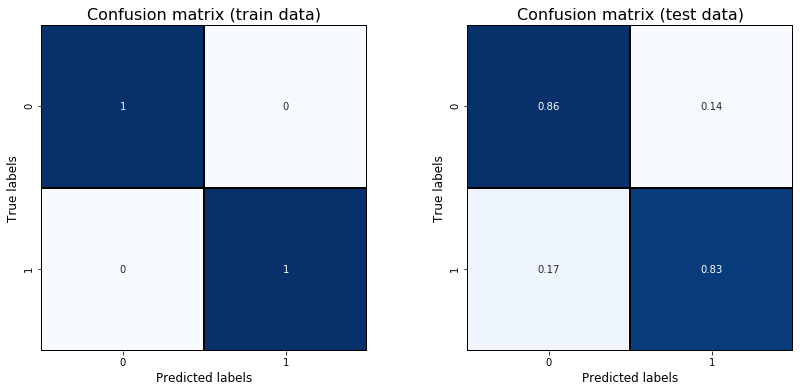

In [65]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
plot_confusion_matrix(y_train, y_train_pred, ax=axis1,
                      title='Confusion matrix (train data)')
plot_confusion_matrix(y_test, y_test_pred, ax=axis2,
                      title='Confusion matrix (test data)')

In [66]:
from sklearn.metrics import classification_report
print('Classification report on Test set: \n', classification_report(y_test, y_test_pred))

Classification report on Test set: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      5055
           1       0.86      0.83      0.84      4945

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Somewhat surprised by this.  I thought that the TFIDF model would outperform the BOW approach.  Both are similar, but the BOW model seems to slighly outpeform this model

# Submit

Will be using the unigram BOW model to make predictions on the test set for submission since it performed the best out of the three models here. 

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

# Only use the top 10,000 words
cv = CountVectorizer(max_features=10000)
train_data_features = cv.fit_transform(data['review'])
print(train_data_features.shape)

(25000, 10000)


#### 3.1.2 Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(train_data_features, data['sentiment'])

In [74]:
test = pd.read_csv('testData.tsv', header=0, delimiter='\t', quoting=3)
clean_test_reviews = clean_corpus(test['review'])

In [75]:
# BOW on test data set
test_data_features = cv.transform(clean_test_reviews)

# Predict sentiments on test set using the trained forest classifer
y_test_pred = forest.predict(test_data_features)

In [77]:
# Output
output = pd.DataFrame(data={'id': test['id'], 'sentiment': y_test_pred})
output.to_csv('BOW_model.csv', index=False, quoting=3)